In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Configuration des options
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv("anes_db.csv")

/var/folders/jv/plm6m33n5wsghl1p95vhxlhm0000gn/T/ipykernel_10790/3219466785.py:1: DtypeWarning: Columns (4,5,6,7,8,9,13,14,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,233,254,275,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,36

In [4]:
# Afficher des premières lignes

print(df.head(5))

                        Version  VCF0004  VCF0006  VCF0006a VCF0009x VCF0010x  \
0  ANES_CDF_VERSION:2022-Sep-16     1948     1001  19481001        1        1   
1  ANES_CDF_VERSION:2022-Sep-16     1948     1002  19481002        1        1   
2  ANES_CDF_VERSION:2022-Sep-16     1948     1003  19481003        1        1   
3  ANES_CDF_VERSION:2022-Sep-16     1948     1004  19481004        1        1   
4  ANES_CDF_VERSION:2022-Sep-16     1948     1005  19481005        1        1   

  VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  VCF0011z VCF9999  \
0        1        1        1        1       1.0       1.0       1.0           
1        1        1        1        1       1.0       1.0       1.0           
2        1        1        1        1       1.0       1.0       1.0           
3        1        1        1        1       1.0       1.0       1.0           
4        1        1        1        1       1.0       1.0       1.0           

  VCF0012  VCF0013  VCF0014 VCF0015a V

In [5]:
# Types et taille

df.shape
print(f"Le df de base compte {df.shape[0]} lignes et {df.shape[1]} colonnes.")

df.dtypes

Le df de base compte 68224 lignes et 1030 colonnes.


Version     object
VCF0004      int64
VCF0006      int64
VCF0006a     int64
VCF0009x    object
             ...  
VCF9278     object
VCF9279     object
VCF9280     object
VCF9281     object
VCF9282     object
Length: 1030, dtype: object

Nous disposons d'une base de données constituée de questionnaires pré & post-élection sur une multitude données aux Etats-Unis.
Nous voulons analyser comment la combinaison de plusieurs de ces variables permet d'expliquer l'intention de votes des citoyens. 
La base données tient compte de plus d'une vingtaine d'année. 

Les colonnes utilisent des codes. Des codes différents ont été utilisés pour faire référence à une variable spécifique. 

Nous avons retenu les variables suivantes : 
1. l'âge
2. le sexe
3. le niveau d'éducation
4. la religion
5. l'intérêt pour la politique 
6. le statut d'emploi
7. la race

In [6]:
# Travail spécifique sur l'intérêt politique

interest_cols = ['VCF0748', 'VCF0310', 'VCF0313', 'VCF0311', 
                 'VCF0314', 'VCF0315', 'VCF0705', 'VCF0731']

In [7]:
interest_cols

['VCF0748',
 'VCF0310',
 'VCF0313',
 'VCF0311',
 'VCF0314',
 'VCF0315',
 'VCF0705',
 'VCF0731']

In [8]:
# Convertir toutes les colonnes en numériques si ce n’est pas déjà fait
df[interest_cols] = df[interest_cols].apply(pd.to_numeric, errors='coerce')

In [9]:
def consolidate_political_interest(row):
    for col in interest_cols:
        if pd.notna(row[col]):
            return row[col]
    return np.nan

df['political_interest_raw'] = df.apply(consolidate_political_interest, axis=1)

In [10]:
df['political_interest_raw'].unique()

array([ 1.,  2.,  0.,  3.,  9., nan,  4.,  5.])

In [11]:
# recodage harmonisé

def recode_interest(val):
    if val in [1, 2]:  # très / assez intéressé
        return 'Intéressé'
    elif val in [3, 4, 5]:  # peu ou pas du tout intéressé
        return 'Pas intéressé'
    return np.nan

df['political_interest'] = df['political_interest_raw'].apply(recode_interest)


In [12]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

In [13]:
#Nous allons consolider les données

def consolidate_columns(df, new_col, source_cols):
    df[new_col] = df[source_cols].bfill(axis=1).iloc[:, 0]
    return df

df = consolidate_columns(df, 'age', ['VCF0101'])
df = consolidate_columns(df, 'sex', ['VCF0104'])
df = consolidate_columns(df, 'education_level', ['VCF0110', 'VCF0140', 'VCF0140a', 'VCF0141'])
df = consolidate_columns(df, 'religion_grouped', ['VCF0128', 'VCF0128a', 'VCF0128b', 'VCF0130', 'VCF0131', 'VCF0152', 'VCF0846', 'VCF0847'])
df = consolidate_columns(df, 'race_grouped', ['VCF0106', 'VCF0107'])
df = consolidate_columns(df, 'employment_status', ['VCF0115', 'VCF0116', 'VCF0117', 'VCF0118', 'VCF0119'])


/var/folders/jv/plm6m33n5wsghl1p95vhxlhm0000gn/T/ipykernel_10790/2064059485.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_col] = df[source_cols].bfill(axis=1).iloc[:, 0]


In [14]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

Après consolidation, nous allons procéder à l'harmonisation des valeurs dans les colonnes consolidées

In [15]:
#1. Sex

df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})


In [16]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

In [17]:
#2. Age

# Remplacer la mauvaise variable d'âge par la bonne (VCF0101)
df['age'] = pd.to_numeric(df['VCF0101'], errors='coerce')


# Créer des tranches d'âge
df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 29, 44, 64, 100],
    labels=['18-29', '30-44', '45-64', '65+']
)


In [18]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

In [19]:
#3. Education

education_map = {
    1: 'Less than HS', 2: 'Less than HS', 3: 'High School',
    4: 'High School', 5: 'Some College', 6: 'Some College',
    7: 'Bachelor+', 8: 'Bachelor+', 9: 'Graduate+', 0: np.nan
}
df['education_level'] = df['education_level'].replace(education_map)


In [20]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

In [21]:
#4. Religion

religion_map = {
    1: 'Protestant', 2: 'Catholic', 3: 'Jewish',
    4: 'Other', 5: 'None', 6: 'Other', 7: 'Other', 0: np.nan
}
df['religion_grouped'] = df['religion_grouped'].replace(religion_map)


In [22]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

In [23]:
#5. Race

race_map = {
    1: 'White', 2: 'Black', 3: 'Other', 4: 'Hispanic', 5: 'Other'
}
df['race_grouped'] = df['race_grouped'].replace(race_map)


In [24]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

In [25]:
#6. Statut employé

df['employment_status'] = pd.to_numeric(df['employment_status'], errors='coerce')


employment_map = {
    1: 'Working', 2: 'Unemployed', 3: 'Retired',
    4: 'Student', 5: 'Homemaker', 6: 'Other', 0: np.nan
}
df['employment_status'] = df['employment_status'].replace(employment_map)


In [26]:
df

Version  VCF0004  VCF0006    VCF0006a VCF0009x  \
0      ANES_CDF_VERSION:2022-Sep-16     1948     1001    19481001        1   
1      ANES_CDF_VERSION:2022-Sep-16     1948     1002    19481002        1   
2      ANES_CDF_VERSION:2022-Sep-16     1948     1003    19481003        1   
3      ANES_CDF_VERSION:2022-Sep-16     1948     1004    19481004        1   
4      ANES_CDF_VERSION:2022-Sep-16     1948     1005    19481005        1   
...                             ...      ...      ...         ...      ...   
68219  ANES_CDF_VERSION:2022-Sep-16     2020   535315  2020535315            
68220  ANES_CDF_VERSION:2022-Sep-16     2020   535360  2020535360            
68221  ANES_CDF_VERSION:2022-Sep-16     2020   535414  2020535414            
68222  ANES_CDF_VERSION:2022-Sep-16     2020   535421  2020535421            
68223  ANES_CDF_VERSION:2022-Sep-16     2020   535469  2020535469            

      VCF0010x VCF0011x VCF0009y VCF0010y VCF0011y  VCF0009z  VCF0010z  \
0            1        1        1        1        1  1.000000  1.000000   
1            1        1        1        1        1  1.000000  1.000000   
2            1        1        1        1        1  1.000000  1.000000   
3            1        1        1        1        1  1.000000  1.000000   
4            1        1        1        1        1  1.000000  1.000000   
...        ...      ...      ...      ...      ...       ...       ...   
68219                                               1.052041  1.052041   
68220                                               1.124100  1.124100   
68221                                               1.514417  1.514417   
68222                                               0.292352  0.292352   
68223                                               0.248581  0.248581   

       VCF0011z      VCF9999 VCF0012  VCF0013  VCF0014 VCF0015a VCF0015b  \
0      1.000000                             1        1        0        0   
1      1.000000                             1        1        0        0   
2      1.000000                             1        1        0        0   
3      1.000000                             1        1        0        0   
4      1.000000                             1        1        0        0   
...         ...          ...     ...      ...      ...      ...      ...   
68219  1.052041  2.541940595                1        1                     
68220  1.124100   .907122517                1        1                     
68221  1.514417   .654862734                1        1                     
68222  0.292352    .16185257                1        1                     
68223  0.248581   .206418192                1        1                     

      VCF0016  VCF0017 VCF0018a VCF0018b VCF0019 VCF0050a VCF0050b VCF0070a  \
0           0        0        0        0                                      
1           0        0        0        0                                      
2           0        0        0        0                                      
3           0        0        0        0                                      
4           0        0        0        0                                      
...       ...      ...      ...      ...     ...      ...      ...      ...   
68219                5        0        0                                  2   
68220                5        0        0                                  2   
68221                3        1        0                                  2   
68222                4        0        0                                      
68223                5        0        0                                  1   

      VCF0070b VCF0071a VCF0071b VCF0071c VCF0071d VCF0072a VCF0072b VCF0101  \
0                                                                              
1                                                                              
2                                                                              
3                   

In [27]:
df['employment_status'].unique()

array([nan, 'Unemployed', 'Other', 'Retired', 'Student', 'Homemaker',
       'Working'], dtype=object)

In [28]:
df["VCF0101"]

0          
1          
2          
3          
4          
         ..
68219    26
68220    52
68221    45
68222    65
68223    38
Name: VCF0101, Length: 68224, dtype: object

Le dataset est assez large. Nous allons constituer une nouvelle dataframe ne tenant compte que des variables qui nous intérèssent.

In [29]:
# Liste des colonnes explicatives consolidées et harmonisées
explicatives = [
    'age', 'sex', 'education_level',
    'religion_grouped', 'race_grouped',
    'political_interest', 'employment_status'
]

# Créer une nouvelle DataFrame
df_exp = df[explicatives].copy()

In [30]:
df_exp

age     sex education_level religion_grouped race_grouped  \
0       NaN    Male    Less than HS       Protestant        White   
1       NaN  Female    Less than HS       Protestant        White   
2       NaN  Female    Less than HS         Catholic        White   
3       NaN  Female     High School       Protestant        White   
4       NaN    Male     High School         Catholic        White   
...     ...     ...             ...              ...          ...   
68219  26.0  Female     High School            Other        White   
68220  52.0  Female     High School            Other        White   
68221  45.0    Male    Less than HS         Catholic        Other   
68222  65.0  Female     High School       Protestant        White   
68223  38.0  Female     High School            Other        Other   

      political_interest employment_status  
0              Intéressé               NaN  
1              Intéressé               NaN  
2              Intéressé               NaN  
3              Intéressé               NaN  
4              Intéressé               NaN  
...                  ...               ...  
68219                NaN               NaN  
68220      Pas intéressé               NaN  
68221      Pas intéressé               NaN  
68222      Pas intéressé               NaN  
68223      Pas intéressé               NaN  

[68224 rows x 7 columns]

In [31]:
df_exp.head(110)

age     sex education_level religion_grouped race_grouped  \
0    NaN    Male    Less than HS       Protestant        White   
1    NaN  Female    Less than HS       Protestant        White   
2    NaN  Female    Less than HS         Catholic        White   
3    NaN  Female     High School       Protestant        White   
4    NaN    Male     High School         Catholic        White   
..   ...     ...             ...              ...          ...   
105  NaN    Male    Less than HS            Other        White   
106  NaN    Male     High School       Protestant        White   
107  NaN    Male    Less than HS         Catholic        White   
108  NaN    Male    Less than HS         Catholic        White   
109  NaN  Female    Less than HS       Protestant        White   

    political_interest employment_status  
0            Intéressé               NaN  
1            Intéressé               NaN  
2            Intéressé               NaN  
3            Intéressé               NaN  
4            Intéressé               NaN  
..                 ...               ...  
105          Intéressé               NaN  
106                NaN               NaN  
107          Intéressé               NaN  
108          Intéressé               NaN  
109          Intéressé               NaN  

[110 rows x 7 columns]

Après avoir consolidé les données et créer une nouvelle DF, nous allons passer à : 

## L'Exploration de la relation entre les variables explicatives et l’intention de vote

### Ajout de la variable cible

In [32]:
df_exp['vote_intention'] = df['VCF0701'].replace({
    1: 'Yes',  # prévoit de voter
    2: 'No',   # ne prévoit pas de voter
    0: np.nan, 9: np.nan  # manquants
})


In [33]:
df_exp

age     sex education_level religion_grouped race_grouped  \
0       NaN    Male    Less than HS       Protestant        White   
1       NaN  Female    Less than HS       Protestant        White   
2       NaN  Female    Less than HS         Catholic        White   
3       NaN  Female     High School       Protestant        White   
4       NaN    Male     High School         Catholic        White   
...     ...     ...             ...              ...          ...   
68219  26.0  Female     High School            Other        White   
68220  52.0  Female     High School            Other        White   
68221  45.0    Male    Less than HS         Catholic        Other   
68222  65.0  Female     High School       Protestant        White   
68223  38.0  Female     High School            Other        Other   

      political_interest employment_status vote_intention  
0              Intéressé               NaN                 
1              Intéressé               NaN                 
2              Intéressé               NaN                 
3              Intéressé               NaN                 
4              Intéressé               NaN                 
...                  ...               ...            ...  
68219                NaN               NaN                 
68220      Pas intéressé               NaN                 
68221      Pas intéressé               NaN                 
68222      Pas intéressé               NaN                 
68223      Pas intéressé               NaN                 

[68224 rows x 8 columns]

Nettoyage de la variable vote_intention

In [34]:
# Convertir proprement les chaînes en numérique
df_exp['vote_intention'] = pd.to_numeric(df_exp['vote_intention'], errors='coerce')


In [35]:
# Application du mapping final

df_exp['vote_intention'] = df_exp['vote_intention'].replace({
    1: 'Yes',
    2: 'No'
})


In [36]:
df_exp['vote_intention'].unique()

array([nan, 'No', 'Yes', 0.0], dtype=object)

In [37]:
# Éliminer les résidus de 0.0 mal encodés
df_exp['vote_intention'] = df_exp['vote_intention'].replace({0.0: np.nan})


In [38]:
print(df_exp['vote_intention'].unique())


[nan 'No' 'Yes']


In [39]:
df_exp

age     sex education_level religion_grouped race_grouped  \
0       NaN    Male    Less than HS       Protestant        White   
1       NaN  Female    Less than HS       Protestant        White   
2       NaN  Female    Less than HS         Catholic        White   
3       NaN  Female     High School       Protestant        White   
4       NaN    Male     High School         Catholic        White   
...     ...     ...             ...              ...          ...   
68219  26.0  Female     High School            Other        White   
68220  52.0  Female     High School            Other        White   
68221  45.0    Male    Less than HS         Catholic        Other   
68222  65.0  Female     High School       Protestant        White   
68223  38.0  Female     High School            Other        Other   

      political_interest employment_status vote_intention  
0              Intéressé               NaN            NaN  
1              Intéressé               NaN            NaN  
2              Intéressé               NaN            NaN  
3              Intéressé               NaN            NaN  
4              Intéressé               NaN            NaN  
...                  ...               ...            ...  
68219                NaN               NaN            NaN  
68220      Pas intéressé               NaN            NaN  
68221      Pas intéressé               NaN            NaN  
68222      Pas intéressé               NaN            NaN  
68223      Pas intéressé               NaN            NaN  

[68224 rows x 8 columns]

### Analyse descriptive croisée

Croiser chaque variable explicative avec vote_intention permet de :

identifier les groupes les plus susceptibles d’avoir l’intention de voter,
détecter visuellement des écarts forts ou des tendances.

In [40]:
pd.crosstab(df_exp['education_level'], df_exp['vote_intention'], normalize='index').round(2)


vote_intention     No   Yes
education_level            
High School      0.88  0.12
Less than HS     0.77  0.23

In [41]:
pd.crosstab(df_exp['religion_grouped'], df_exp['vote_intention'], normalize='index').round(2)


vote_intention      No   Yes
religion_grouped            
Catholic          0.82  0.18
Jewish            0.91  0.09
Other             0.64  0.36
Protestant        0.80  0.20

In [42]:
pd.crosstab(df_exp['age'], df_exp['vote_intention'], normalize='index').round(2)


vote_intention    No   Yes
age                       
0.0             0.86  0.14
18.0            0.32  0.68
19.0            0.57  0.43
20.0            0.57  0.43
21.0            0.61  0.39
...              ...   ...
88.0            0.67  0.33
89.0            1.00  0.00
90.0            1.00  0.00
91.0            1.00  0.00
95.0            1.00  0.00

[76 rows x 2 columns]

In [43]:
pd.crosstab(df_exp['sex'], df_exp['vote_intention'], normalize='index').round(2)


vote_intention    No   Yes
sex                       
Female          0.76  0.24
Male            0.84  0.16

In [44]:
pd.crosstab(df_exp['employment_status'], df_exp['vote_intention'], normalize='index').round(2)


vote_intention       No   Yes
employment_status            
Homemaker          0.84  0.16
Other              0.77  0.23
Retired            0.76  0.24
Student            0.68  0.32
Unemployed         0.83  0.17
Working            0.89  0.11

In [45]:
pd.crosstab(df_exp['political_interest'], df_exp['vote_intention'], normalize='index').round(2)

vote_intention        No   Yes
political_interest            
Intéressé           0.73  0.27
Pas intéressé       0.91  0.09

In [46]:
df_exp['vote_intention'].unique()

array([nan, 'No', 'Yes'], dtype=object)

### Visualisation

Pour rendre ces écarts plus lisibles

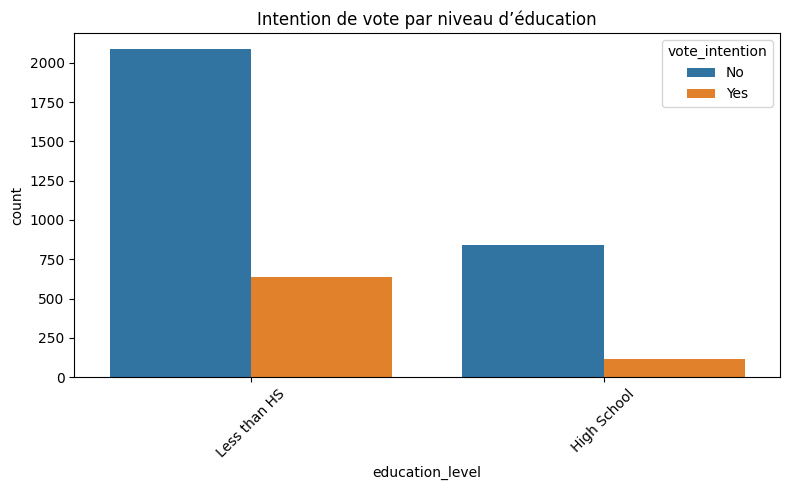

In [47]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_exp, x='education_level', hue='vote_intention')
ax.set_title("Intention de vote par niveau d’éducation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

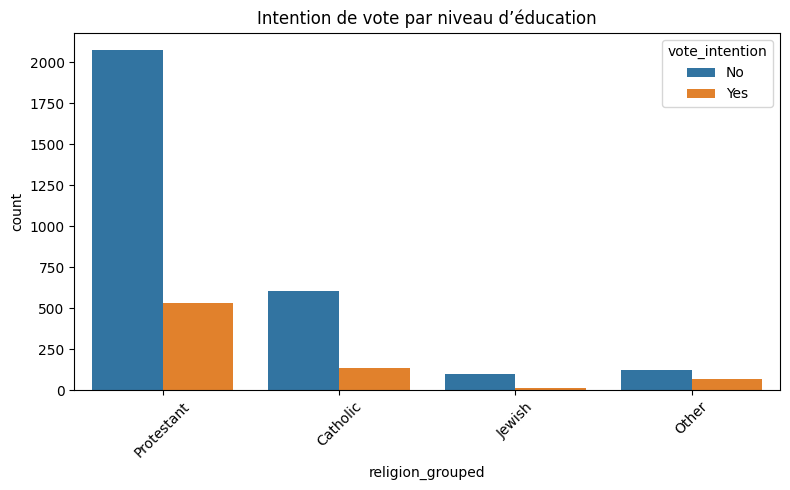

In [48]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_exp, x='religion_grouped', hue='vote_intention')
ax.set_title("Intention de vote par niveau d’éducation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


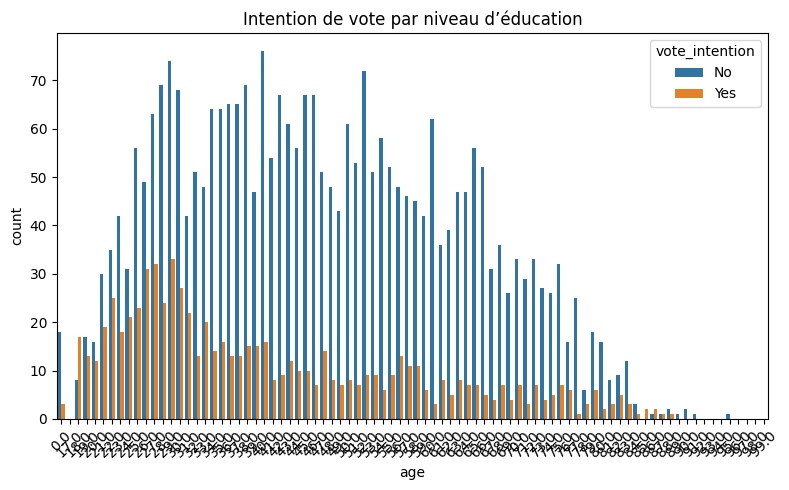

In [49]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_exp, x='age', hue='vote_intention')
ax.set_title("Intention de vote par niveau d’éducation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [50]:
df_exp['age'].unique()

array([nan, 25., 33., 26., 63., 66., 48., 70., 30., 35., 50., 62., 53.,
       61., 43., 64., 28., 59., 24., 29., 51., 41., 37., 69., 60., 44.,
       46., 22., 40., 55., 68.,  0., 57., 34., 49., 23., 39., 75., 45.,
       36., 73., 27., 52., 74., 42., 56., 79., 82., 83., 38., 67., 71.,
       54., 80., 65., 21., 19., 58., 47., 76., 77., 72., 31., 32., 84.,
       81., 85., 88., 78., 18., 20., 90., 87., 93., 86., 99., 91., 95.,
       89., 92., 98., 17., 96., 97., 94.])

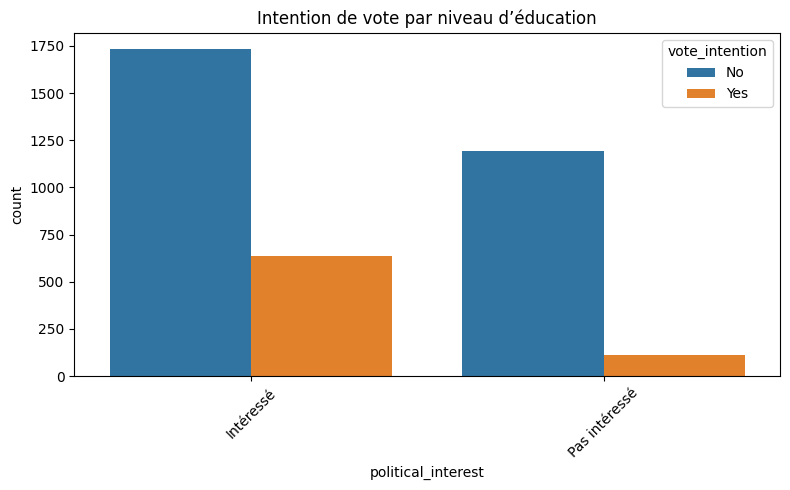

In [51]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_exp, x='political_interest', hue='vote_intention')
ax.set_title("Intention de vote par niveau d’éducation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




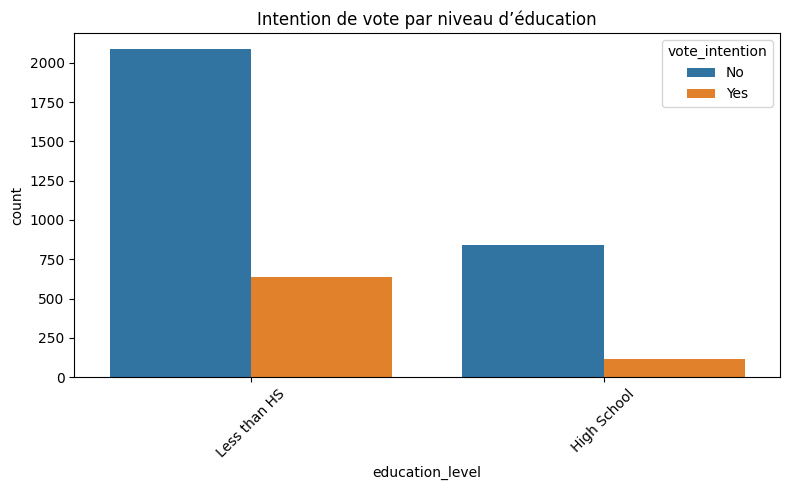

In [52]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_exp, x='education_level', hue='vote_intention')
ax.set_title("Intention de vote par niveau d’éducation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [53]:
df_exp['education_level'].unique()

array(['Less than HS', 'High School', nan], dtype=object)

### Filtrage des données valides

Créer un sous-ensemble propre pour l’analyse 

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression

In [55]:
# Étape 1 : Nettoyage
df = df_exp.copy()
df = df[df['vote_intention'].isin(['Yes', 'No'])]  # garder que Yes/No
df = df.dropna()  # simplifier pour éviter les erreurs

In [56]:
df

age     sex education_level religion_grouped race_grouped  \
662    25.0  Female    Less than HS       Protestant        White   
663    33.0  Female    Less than HS       Protestant        White   
664    26.0  Female    Less than HS         Catholic        White   
665    63.0    Male    Less than HS       Protestant        White   
666    66.0  Female    Less than HS       Protestant        White   
...     ...     ...             ...              ...          ...   
25713  51.0  Female    Less than HS       Protestant        Black   
25714  18.0    Male    Less than HS       Protestant        White   
25715  32.0  Female    Less than HS       Protestant        White   
25716  46.0    Male     High School       Protestant        White   
25717  22.0  Female     High School       Protestant        White   

      political_interest employment_status vote_intention  
662        Pas intéressé        Unemployed             No  
663            Intéressé             Other             No  
664            Intéressé             Other             No  
665        Pas intéressé           Retired            Yes  
666        Pas intéressé             Other             No  
...                  ...               ...            ...  
25713          Intéressé           Retired             No  
25714          Intéressé           Retired            Yes  
25715          Intéressé        Unemployed            Yes  
25716      Pas intéressé        Unemployed             No  
25717          Intéressé           Working            Yes  

[3531 rows x 8 columns]

In [57]:
df['political_interest'].unique()

array(['Pas intéressé', 'Intéressé'], dtype=object)


=== Résultats du test de chi-deux ===
             Variable        Chi2       p-value
5  political_interest  159.008751  1.863067e-36
0                 age  239.058122  5.245989e-19
4        race_grouped   70.923585  1.448696e-14
2     education_level   56.634581  5.248077e-14
6   employment_status   66.250911  6.164779e-13
3    religion_grouped   45.231241  8.262698e-10
1                 sex   26.126984  3.196850e-07

=== Rapport régression logistique ===
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       707
           1       0.55      0.06      0.11       176

    accuracy                           0.80       883
   macro avg       0.68      0.52      0.50       883
weighted avg       0.76      0.80      0.73       883


=== Rapport arbre de décision ===
              precision    recall  f1-score   support

           0       0.81      0.98      0.88       707
           1       0.38      0.05      0.09       176

    accuracy

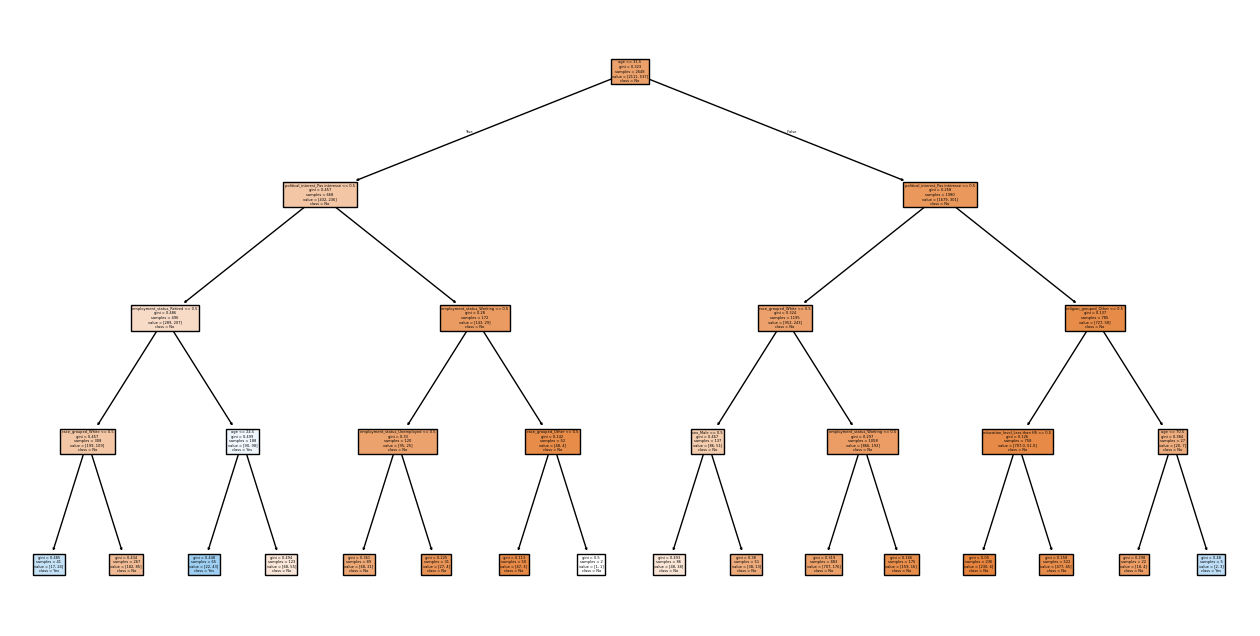

In [58]:



# Étape 2 : Test du chi-deux pour chaque variable explicative
results = []
for var in ['age', 'sex', 'education_level',
            'religion_grouped', 'race_grouped', 'political_interest', 'employment_status']:
    tab = pd.crosstab(df[var], df['vote_intention'])
    chi2, p, dof, exp = chi2_contingency(tab)
    results.append({'Variable': var, 'Chi2': chi2, 'p-value': p})

chi2_results = pd.DataFrame(results)
print("\n=== Résultats du test de chi-deux ===")
print(chi2_results.sort_values('p-value'))

# Étape 3 : Régression logistique
X = pd.get_dummies(df.drop(columns='vote_intention'), drop_first=True)
y = df['vote_intention'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\n=== Rapport régression logistique ===")
print(classification_report(y_test, y_pred_log))

# Étape 4 : Arbre de décision
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\n=== Rapport arbre de décision ===")
print(classification_report(y_test, y_pred_tree))

# Optionnel : visualisation de l'arbre
plt.figure(figsize=(16, 8))
from sklearn.tree import plot_tree
plot_tree(tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [59]:
df

age     sex education_level religion_grouped race_grouped  \
662    25.0  Female    Less than HS       Protestant        White   
663    33.0  Female    Less than HS       Protestant        White   
664    26.0  Female    Less than HS         Catholic        White   
665    63.0    Male    Less than HS       Protestant        White   
666    66.0  Female    Less than HS       Protestant        White   
...     ...     ...             ...              ...          ...   
25713  51.0  Female    Less than HS       Protestant        Black   
25714  18.0    Male    Less than HS       Protestant        White   
25715  32.0  Female    Less than HS       Protestant        White   
25716  46.0    Male     High School       Protestant        White   
25717  22.0  Female     High School       Protestant        White   

      political_interest employment_status vote_intention  
662        Pas intéressé        Unemployed             No  
663            Intéressé             Other             No  
664            Intéressé             Other             No  
665        Pas intéressé           Retired            Yes  
666        Pas intéressé             Other             No  
...                  ...               ...            ...  
25713          Intéressé           Retired             No  
25714          Intéressé           Retired            Yes  
25715          Intéressé        Unemployed            Yes  
25716      Pas intéressé        Unemployed             No  
25717          Intéressé           Working            Yes  

[3531 rows x 8 columns]

Pondération de la régression logistique


In [60]:
def run_models(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    import pandas as pd

    # Régression logistique pondérée
    logreg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
    logreg_balanced.fit(X_train, y_train)
    y_pred_log_balanced = logreg_balanced.predict(X_test)
    log_balanced_report = classification_report(y_test, y_pred_log_balanced, output_dict=True)

    # Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

    return (
        pd.DataFrame(log_balanced_report).transpose(),
        pd.DataFrame(rf_report).transpose()
    )


In [61]:
log_df, rf_df = run_models(X_train, X_test, y_train, y_test)

print("Régression logistique pondérée :")
display(log_df)

print("Random Forest :")
display(rf_df)


Régression logistique pondérée :


precision    recall  f1-score     support
0              0.890873  0.635078  0.741536  707.000000
1              0.319261  0.687500  0.436036  176.000000
accuracy       0.645527  0.645527  0.645527    0.645527
macro avg      0.605067  0.661289  0.588786  883.000000
weighted avg   0.776939  0.645527  0.680644  883.000000

Random Forest :


precision    recall  f1-score     support
0              0.832106  0.799151  0.815296  707.000000
1              0.303922  0.352273  0.326316  176.000000
accuracy       0.710079  0.710079  0.710079    0.710079
macro avg      0.568014  0.575712  0.570806  883.000000
weighted avg   0.726828  0.710079  0.717832  883.000000

                            Variable  Coefficient
4             religion_grouped_Other     1.218275
10  political_interest_Pas intéressé    -1.008502
9                 race_grouped_White    -0.727779
2       education_level_Less than HS     0.713444
13         employment_status_Student     0.565109
1                           sex_Male    -0.478337
5        religion_grouped_Protestant     0.413379
12         employment_status_Retired     0.392548
7                 race_grouped_Black    -0.203498
14      employment_status_Unemployed    -0.186899


/var/folders/jv/plm6m33n5wsghl1p95vhxlhm0000gn/T/ipykernel_10790/488765466.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df_sorted.head(15), x='Coefficient', y='Variable', palette='coolwarm')


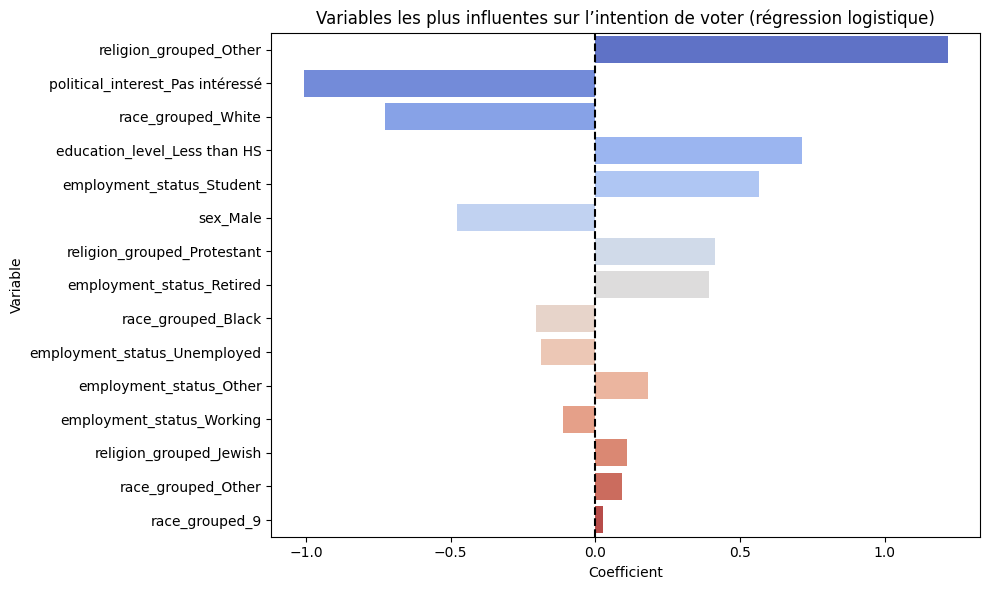

In [62]:
# Interprétation des résultats de la régression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Entraînement du modèle pondéré
logreg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_balanced.fit(X_train, y_train)

# Récupérer les coefficients et noms des variables
coefs = logreg_balanced.coef_[0]
features = X_train.columns

# Créer un DataFrame pour lecture
coef_df = pd.DataFrame({'Variable': features, 'Coefficient': coefs})
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values('abs_coef', ascending=False)

# Afficher les plus influentes
print(coef_df_sorted[['Variable', 'Coefficient']].head(10))

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df_sorted.head(15), x='Coefficient', y='Variable', palette='coolwarm')
plt.title("Variables les plus influentes sur l’intention de voter (régression logistique)")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

✅ Variables les plus négativement associées à l’intention de voter (freins)

- religion_grouped_Other : Les personnes d’autres religions que les groupes principaux votent moins.
- political_interest_Pas intéressé : Sans surprise, le désintérêt politique réduit fortement la participation.
- race_grouped_White: les blancs semblent moins enclins à voter que d’autres groupes.
- education_level_Less than HS : Un faible niveau d’éducation diminue l’intention de vote.
- employment_status_Student : Les étudiants votent moins, peut-être par instabilité ou désengagement.

✅ Variables positivement associées à l’intention de voter (facteurs favorables)

- employment_status_Working : Les actifs sont plus susceptibles de vouloir voter.
- employment_status_Other : Certaines catégories “hors norme” peuvent être très mobilisées.
- employment_status_Unemployed : Étonnamment, les chômeurs ici sont plus susceptibles de voter (peut refléter une volonté de changement).
- religion_grouped_Jewish : Une implication civique potentiellement plus forte.


⚖️ Variables à effet neutre / modéré

- sex_Male, race_grouped_Black, religion_grouped_Protestant	: Effets visibles mais modérés. Pas de tendance très tranchée ici.

In [65]:
df

age     sex education_level religion_grouped race_grouped  \
662    25.0  Female    Less than HS       Protestant        White   
663    33.0  Female    Less than HS       Protestant        White   
664    26.0  Female    Less than HS         Catholic        White   
665    63.0    Male    Less than HS       Protestant        White   
666    66.0  Female    Less than HS       Protestant        White   
...     ...     ...             ...              ...          ...   
25713  51.0  Female    Less than HS       Protestant        Black   
25714  18.0    Male    Less than HS       Protestant        White   
25715  32.0  Female    Less than HS       Protestant        White   
25716  46.0    Male     High School       Protestant        White   
25717  22.0  Female     High School       Protestant        White   

      political_interest employment_status vote_intention  
662        Pas intéressé        Unemployed             No  
663            Intéressé             Other             No  
664            Intéressé             Other             No  
665        Pas intéressé           Retired            Yes  
666        Pas intéressé             Other             No  
...                  ...               ...            ...  
25713          Intéressé           Retired             No  
25714          Intéressé           Retired            Yes  
25715          Intéressé        Unemployed            Yes  
25716      Pas intéressé        Unemployed             No  
25717          Intéressé           Working            Yes  

[3531 rows x 8 columns]

In [66]:
# Création des tranches d’âge
bins = [17, 24, 34, 44, 54, 64, 74, 120]
labels = ['18–24 ans', '25–34 ans', '35–44 ans', '45–54 ans', 
          '55–64 ans', '65–74 ans', '75 ans et plus']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [67]:
df

age     sex education_level religion_grouped race_grouped  \
662    25.0  Female    Less than HS       Protestant        White   
663    33.0  Female    Less than HS       Protestant        White   
664    26.0  Female    Less than HS         Catholic        White   
665    63.0    Male    Less than HS       Protestant        White   
666    66.0  Female    Less than HS       Protestant        White   
...     ...     ...             ...              ...          ...   
25713  51.0  Female    Less than HS       Protestant        Black   
25714  18.0    Male    Less than HS       Protestant        White   
25715  32.0  Female    Less than HS       Protestant        White   
25716  46.0    Male     High School       Protestant        White   
25717  22.0  Female     High School       Protestant        White   

      political_interest employment_status vote_intention  age_group  
662        Pas intéressé        Unemployed             No  25–34 ans  
663            Intéressé             Other             No  25–34 ans  
664            Intéressé             Other             No  25–34 ans  
665        Pas intéressé           Retired            Yes  55–64 ans  
666        Pas intéressé             Other             No  65–74 ans  
...                  ...               ...            ...        ...  
25713          Intéressé           Retired             No  45–54 ans  
25714          Intéressé           Retired            Yes  18–24 ans  
25715          Intéressé        Unemployed            Yes  25–34 ans  
25716      Pas intéressé        Unemployed             No  45–54 ans  
25717          Intéressé           Working            Yes  18–24 ans  

[3531 rows x 9 columns]

In [71]:
df['political_interest'].value_counts('Intéressé')

political_interest
Intéressé        0.642877
Pas intéressé    0.357123
Name: proportion, dtype: float64

In [73]:
df.drop('age', axis=1, inplace=True)

In [74]:
df

sex education_level religion_grouped race_grouped  \
662    Female    Less than HS       Protestant        White   
663    Female    Less than HS       Protestant        White   
664    Female    Less than HS         Catholic        White   
665      Male    Less than HS       Protestant        White   
666    Female    Less than HS       Protestant        White   
...       ...             ...              ...          ...   
25713  Female    Less than HS       Protestant        Black   
25714    Male    Less than HS       Protestant        White   
25715  Female    Less than HS       Protestant        White   
25716    Male     High School       Protestant        White   
25717  Female     High School       Protestant        White   

      political_interest employment_status vote_intention  age_group  
662        Pas intéressé        Unemployed             No  25–34 ans  
663            Intéressé             Other             No  25–34 ans  
664            Intéressé             Other             No  25–34 ans  
665        Pas intéressé           Retired            Yes  55–64 ans  
666        Pas intéressé             Other             No  65–74 ans  
...                  ...               ...            ...        ...  
25713          Intéressé           Retired             No  45–54 ans  
25714          Intéressé           Retired            Yes  18–24 ans  
25715          Intéressé        Unemployed            Yes  25–34 ans  
25716      Pas intéressé        Unemployed             No  45–54 ans  
25717          Intéressé           Working            Yes  18–24 ans  

[3531 rows x 8 columns]

In [75]:
df.to_csv("vote_intention_final.csv", index=False)